<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

# 고객 신용도 예측


<img src = "https://github.com/Jangrae/img/blob/master/credit-card.jpg?raw=true" width=900 align="left"/>

# 실습 안내


**데이터 정보**

<img src = "https://github.com/Jangrae/img/blob/master/credit.png?raw=true" width=550 align="left"/>

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/credit_NA.csv'
path = 'https://bit.ly/CreditFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

## 2.1.기본 정보 확인

- 데이터에 대한 기본 정보를 우선 확인합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 데이터 확인
data.head()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [4]:
# 하위 데이터 확인
data.tail()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
995,1,1,12,2,3,1680,5,4,1,1,35.0,2,1,3,1,1
996,1,1,42,2,2,7882,4,3,4,2,45.0,3,1,3,1,1
997,0,2,54,0,9,15945,2,3,4,4,58.0,1,1,3,2,1
998,1,2,15,4,3,1537,5,3,4,1,50.0,2,2,3,2,1
999,0,3,12,2,0,1386,3,2,2,2,26.0,2,1,3,1,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Creditability   1000 non-null   int64  
 1   AccountBalance  1000 non-null   int64  
 2   CreditDuration  1000 non-null   int64  
 3   Payment         1000 non-null   int64  
 4   Purpose         1000 non-null   int64  
 5   CreditAmount    1000 non-null   int64  
 6   Employment      1000 non-null   int64  
 7   SexMarital      1000 non-null   int64  
 8   CurrentAddress  1000 non-null   int64  
 9   MostValuable    1000 non-null   int64  
 10  Age             983 non-null    float64
 11  ApartmentType   1000 non-null   int64  
 12  NoCredits       1000 non-null   int64  
 13  Occupation      1000 non-null   int64  
 14  Telephone       1000 non-null   int64  
 15  ForeignWorker   1000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 125.1 KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초 통계 정보
data.describe()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,983.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.495422,1.928000,1.407000,2.904000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.302980,0.530186,0.577654,0.653614,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,2.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

> Age에 17개의 결측치 존재

#### 5) 상관분석

In [12]:
# 상관분석
data.corr()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
Creditability,1.000000,0.339409,-0.214927,0.228785,-0.017979,-0.154740,0.116002,0.088184,-0.002967,-0.142612,0.088471,0.018119,0.045732,-0.032735,0.036466,0.082079
AccountBalance,0.339409,1.000000,-0.071254,0.171727,0.047787,-0.041161,0.088960,0.037549,-0.064727,-0.030244,0.053994,0.029771,0.059144,0.030366,0.063609,-0.036607
CreditDuration,-0.214927,-0.071254,1.000000,-0.077186,0.147492,0.624988,0.057381,0.014789,0.034067,0.303971,-0.034400,0.153126,-0.011284,0.210910,0.164718,-0.134680
Payment,0.228785,0.171727,-0.077186,1.000000,-0.090336,-0.059915,0.138225,0.042171,0.063198,-0.053777,0.138391,0.061428,0.437066,0.010350,0.052370,0.028554
Purpose,-0.017979,0.047787,0.147492,-0.090336,1.000000,0.068480,0.016013,0.000157,-0.038221,0.010966,-0.007611,0.013495,0.054935,0.008085,0.078371,-0.113244
CreditAmount,-0.154740,-0.041161,0.624988,-0.059915,0.068480,1.000000,-0.008376,-0.016094,0.028917,0.311602,0.038014,0.133024,0.020785,0.285393,0.277000,-0.030662
Employment,0.116002,0.088960,0.057381,0.138225,0.016013,-0.008376,1.000000,0.111278,0.245081,0.087187,0.264133,0.115077,0.125791,0.101225,0.060518,-0.022845
SexMarital,0.088184,0.037549,0.014789,0.042171,0.000157,-0.016094,0.111278,1.000000,-0.027269,-0.006940,0.004510,0.098934,0.064672,-0.011956,0.027275,0.073103
CurrentAddress,-0.002967,-0.064727,0.034067,0.063198,-0.038221,0.028917,0.245081,-0.027269,1.000000,0.147231,0.269394,0.009990,0.089625,0.012655,0.095359,-0.039691
MostValuable,-0.142612,-0.030244,0.303971,-0.053777,0.010966,0.311602,0.087187,-0.006940,0.147231,1.000000,0.078384,0.342969,-0.007765,0.276149,0.196802,-0.132462


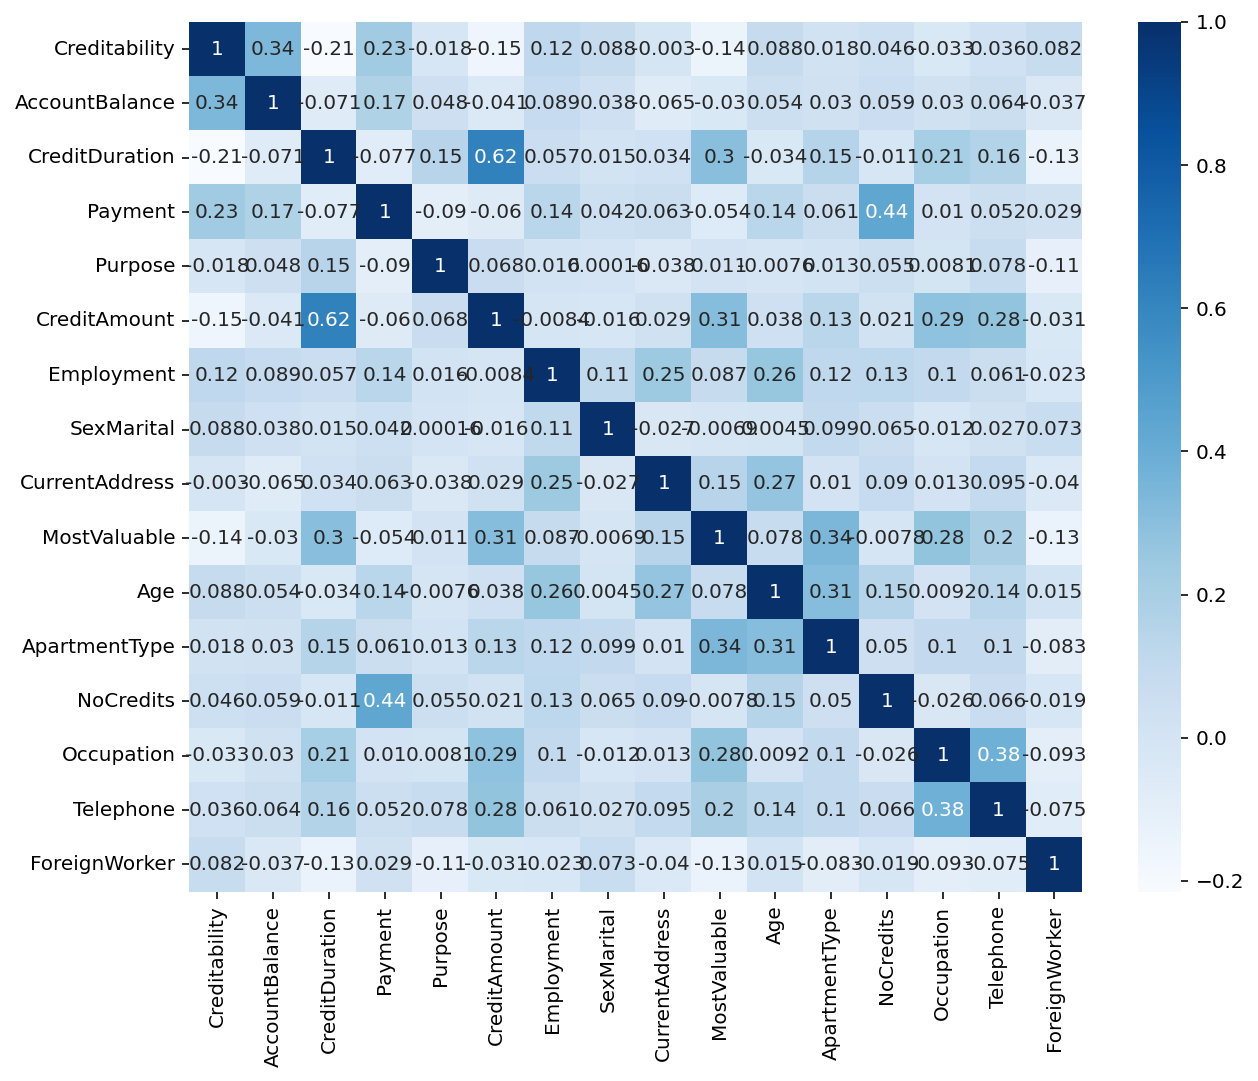

In [13]:
# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

## 2.2.데이터 상세 확인

**1) Target 값 분포 확인**

- Target 변수인 Creditability 변수의 값 분포를 확인합니다.

1    700
0    300
Name: Creditability, dtype: int64


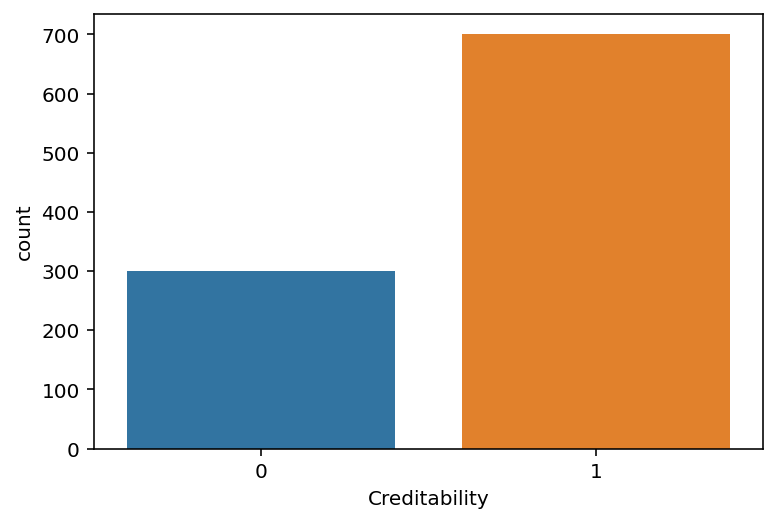

In [4]:
# Creditability 값 분포
print(data['Creditability'].value_counts())
sns.countplot(x=data['Creditability'])
plt.show()

- 대출 승인된 경우가 대출 안되는 경우보다 2배 정도 높다.
- --> 머신러닝 진행시 데이터 불균형 문제가 보인다.
- --> resamling을 통한 데이터 불균형 해소가 필요해 보인다.

**2) 변수 구분**

- Target 변수(Creditability)를 제외한 변수를 범주형과 연속형으로 구분해 목륵을 정리합니다.
- 목록 개수는 필요한 만큼 늘려 사용합니다.

- 범주형 변수 (가변수화 대상)
    - AccountBalance  
    -   Payment         
    -   Purpose         
    -   Employment      
    -  SexMarital      
    - CurrentAddress  
    - MostValuable    
    - ApartmentType   
    - NoCredits       
    - Occupation      
    - Telephone       
    - ForeignWorker   

- 연속형 변수 (정규화 대상)
    -  Age
    -  CreditAmount
    - CreditDuration

**3) 범주형 변수 확인**

- Target 변수(Creditability)를 제외한 범주형 변수의 범주값과 그 값의 개수를 확인합니다.
- 참고: 대상 변수를 리스트로 선언하고 반복문을 수행해 확인하면 편리합니다.

In [7]:
# 범주값 개수 확인
col_r = ['AccountBalance', 'Payment', 'Purpose', 'Employment',
         'SexMarital', 'CurrentAddress', 'MostValuable' ,'ApartmentType',
         'NoCredits', 'Occupation', 'Telephone', 'ForeignWorker']

for i in col_r:
    print(data[i].value_counts())
    print('='*70)

3    457
1    274
2    269
Name: AccountBalance, dtype: int64
2    530
4    293
3     88
1     49
0     40
Name: Payment, dtype: int64
3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64
3    548
2    310
4     92
1     50
Name: SexMarital, dtype: int64
4    413
2    308
3    149
1    130
Name: CurrentAddress, dtype: int64
3    332
1    282
2    232
4    154
Name: MostValuable, dtype: int64
2    714
1    179
3    107
Name: ApartmentType, dtype: int64
1    633
2    333
3     28
4      6
Name: NoCredits, dtype: int64
3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64
1    596
2    404
Name: Telephone, dtype: int64
1    963
2     37
Name: ForeignWorker, dtype: int64


- 각 변수에 해당하는 범주값이 많아서 가변수화를 진행하는게 좋아 보인다.
- 각 범주에 비슷한 경우의 수를 가진 변수도 있고, 한쪽으로 몰려있는 변수도 보인다.

## 단변량 분석

- Purpose

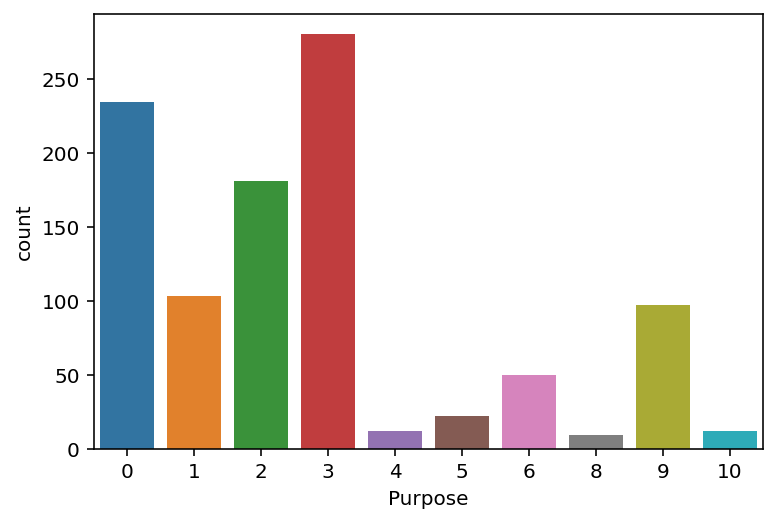

In [15]:
# Purpose 분석
sns.countplot(x=data['Purpose'])
# label_x = ['others', 'new car', 'uesd car', 'furniture', 'TV', 'appliances', 'repair', 'vacation', 'business']
plt.show()

- 대출목적에서 3(가구) > 2(중고차) > 1(새차) > 9(재훈련) 순으로 나타난다.
- 가구를 사기 위해 대출을 많이 받는 것으로 보아 해당 은행에서는 신혼부부(2인 가구)나 1인 가구와 같이 새롭게 가정을 이뤄지는 가구를 위한 대출 서비스가 잘 되어 있을 것이다.
- 2, 3번째로 자동차를 사기 위해 대출을 많이 받는 것으로 보아 해당 은행에서는 차를 살 때 대출 서비스가 잘 되어 있을 것이다.

- SexMarital 분석

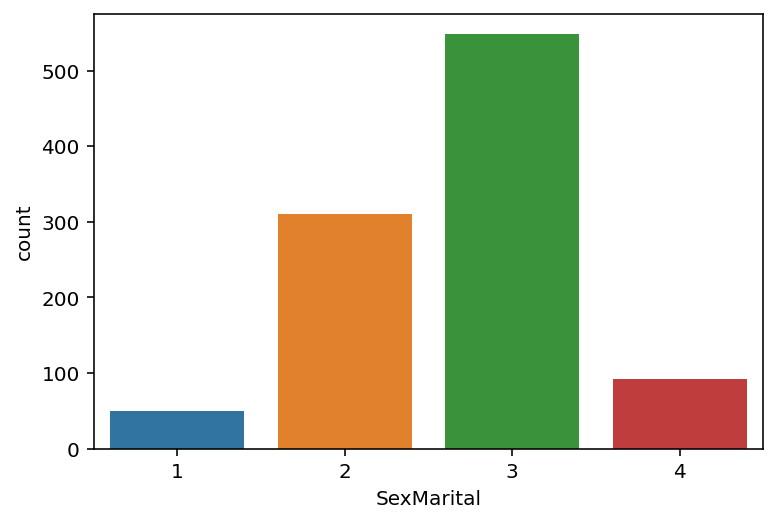

In [34]:
# SexMarital
sns.countplot(x=data['SexMarital'])
plt.show()

- 해당 은행에서 대출을 신청한 성별에서 남자(1~3)가 여자(4)보다 압도적으로 많다.
- 해당 은행에서는 타겟 성별을 남자로 한 것 같아 보인다
- 3(결혼한 남자)가 대출 신청이 많은 것은 가장의 역할을 하고 있기 때문일 것이다.
- 2(미혼 남자)의 경우가 2번째로 많은 것을 볼 수 있는데, 혼자 사는 남자의 경우 부양할 가족이 없기 때문에 오로지 자신에게 투자를 많이 할 것 같다.
- -> 장기적인 입장에서, 1인가구가 증가하는 시대에 미혼 남자를 타겟으로 마켓팅과 대출 서비스 등을 미리 만들어 놓으면 독점시장을 노려볼 수 있지 않을까?
- -> 그렇다면 미혼 남자의 경우 어떤 목적으로 대출을 받으려 하는지 확인해보자

- 미혼 남자의 대출 목적

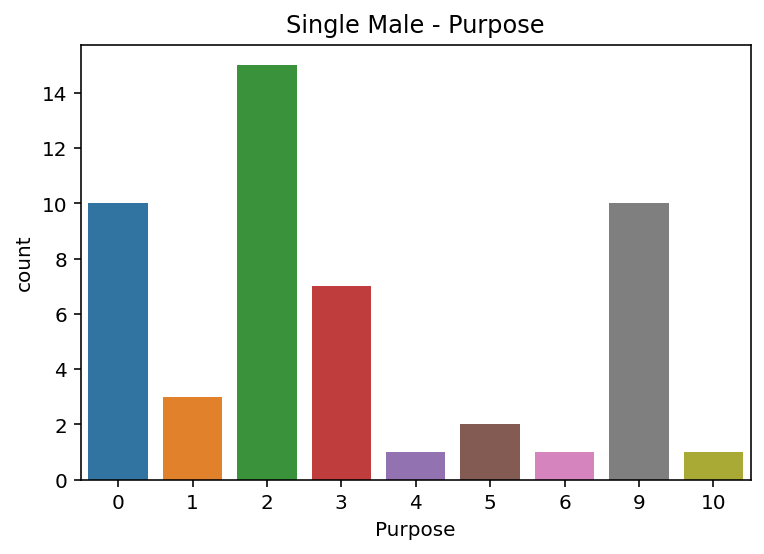

In [33]:
# 미혼 남자의 대출 목적 시각화
sns.countplot(data.loc[data['SexMarital']==1, 'Purpose'])
plt.title('Single Male - Purpose')
plt.show()

- 중고차(2)를 위한 대출 목적이 가장 많은 것을 볼 수 있다.
- 전체 대출목적에서 재훈련(9)은 4번째 순위였는데, 미혼 남자의 경우 2번째로 많이 차지한 것을 볼 수 있다. 
- -> 미혼 남자의 경우 부양 가족이 없어 자신에게 투자하는 비용이 많다.
- -> 첫 번째로는 차, 두 번째로는 자신의 역량 강화임을 알 수 있다
- -> 광고를 찍는다면, 똑똑한 이미지를 가지고 있는 30-40대 모델을 내세운다.

- MostValuable

In [52]:
data['MostValuable'].value_counts().index
data['MostValuable'].value_counts().index-1

Int64Index([3, 1, 2, 4], dtype='int64')

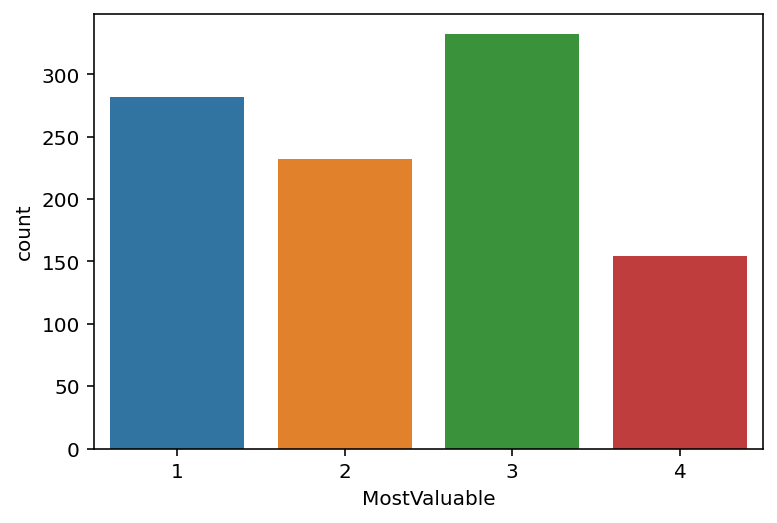

In [54]:
# MostValuable
sns.countplot(x=data['MostValuable'])
plt.show()

- 가장 가치있는 자산 중 생명보험(3) > 없음(1) > 자동차(2) > 부동산(4) 순으로 응답결과가 나타난다.
- 위에서 대출목적 중 자동차가 많은 이유로 나왔는데 가치있는 자산에서도 자연스럽게 자동차의 응답결과가 많은 것을 알 수 있다.

## 이변량 분석

**4) AccountBalance 변수 확인**

- Creditability 변수 값으로 구분해 AccountBalance 변수 값 분포를 막대그래프로 시각화해 확인합니다.

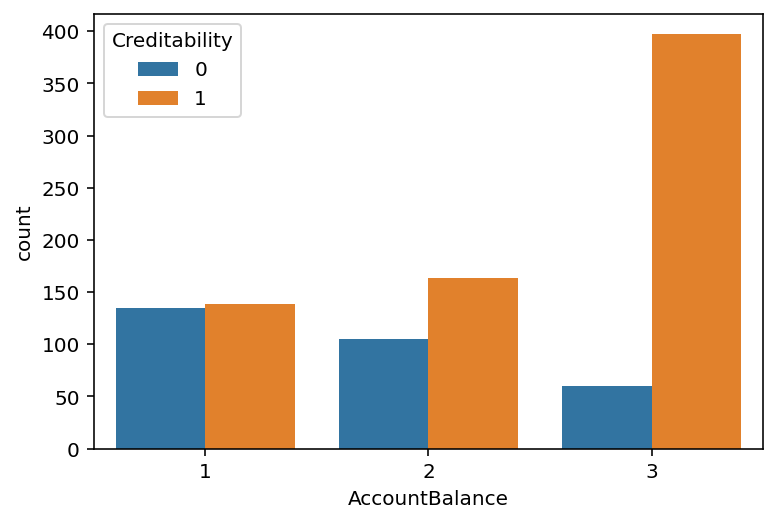

In [82]:
# AccountBalance --> Creditability 값 분포
sns.countplot(x=data['AccountBalance'], hue=data['Creditability'])
plt.show()

- 은행 잔고에서 계좌 없음과 잔액 없음의 대출 승인 건수는 비슷한 양상을 보이지만, 
- 은행 잔고 있음 부분에서 대출 승인 건수 차이가 확연히 차이가 나는 것을 볼 수 있다.
- --> 은행 잔고 잔액별 대출 승인 건수에 대해 추가 분석을 진행해 보는 것이 좋을 것 같다.
- --> 은행 잔고 금액이 어느정도 있어야 대출 승인이 나는지?

**5) Payment 변수 확인**

- Creditability 변수 값으로 구분해 Payment 변수 값 분포를 막대그래프로 시각화해 확인합니다.

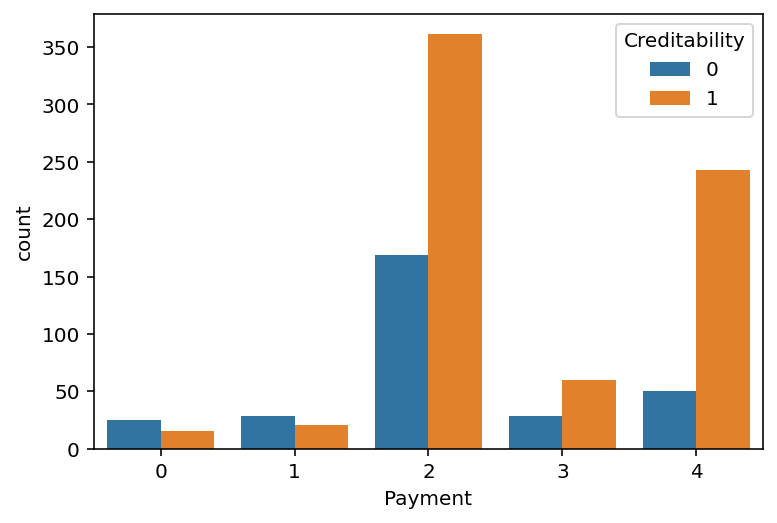

In [83]:
# Payment --> Creditability 값 분포
sns.countplot(x=data['Payment'],  hue=data['Creditability'])
plt.show()

- 0(지연), 1(다른 대출도 있음)의 경우 대출 승인 거부 건수가 더 많은 것을 볼 수 있다.
- -> 은행 입장에서는 대출금을 제때 납입하지 않거나, 다른 대출을 받은 고객의 신용도가 낮을 수 밖에 없다.
- 2(완납), 3(최근 신용 상태 문제 없음), 4(이전 대출 완납)의 경우 대출 승인 건수가 더 많은 것을 볼 수 있다.
- 특히나 2(완납)의 경우 대출 승인 건수가 가장 많은 것을 볼 수 있다.
- -> 하지만, 완납을 한 경우에도 대출 승인 거부의 건수가 절반을 차지하고 있다.
- -> 과거의 대출을 완납을 했지만 최근 신용도가 낮아진 경우도 있을 것이다.
- 4(이전 대출 완납)의 경우 대출 승인율이 가장 높은 것을 볼 수 있다.
- -> 아무래도 은행 입장에서 과거 완납 기록이 남아있기 때문에 대출 승인을 잘 해줬지 않았을까

**6) Employment 변수 확인**

- Creditability 변수 값으로 구분해 Employment 변수 값 분포를 막대그래프로 시각화해 확인합니다.

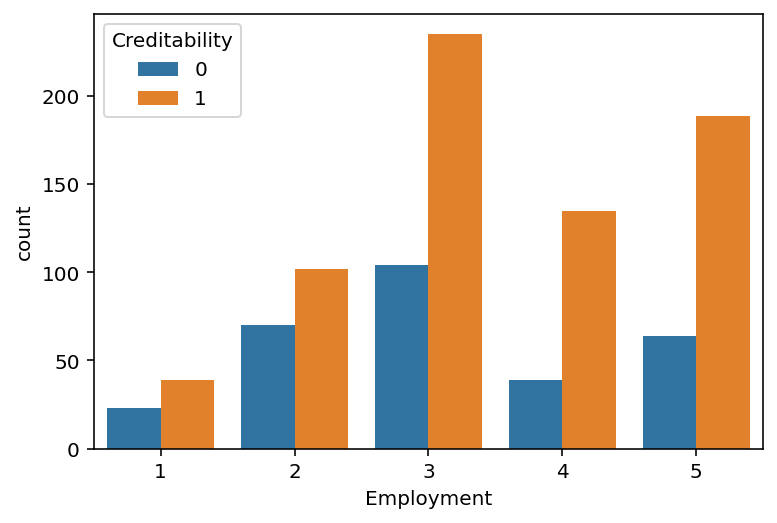

In [84]:
# Payment --> Creditability 값 분포
sns.countplot(x=data['Employment'], hue=data['Creditability'])
plt.show()

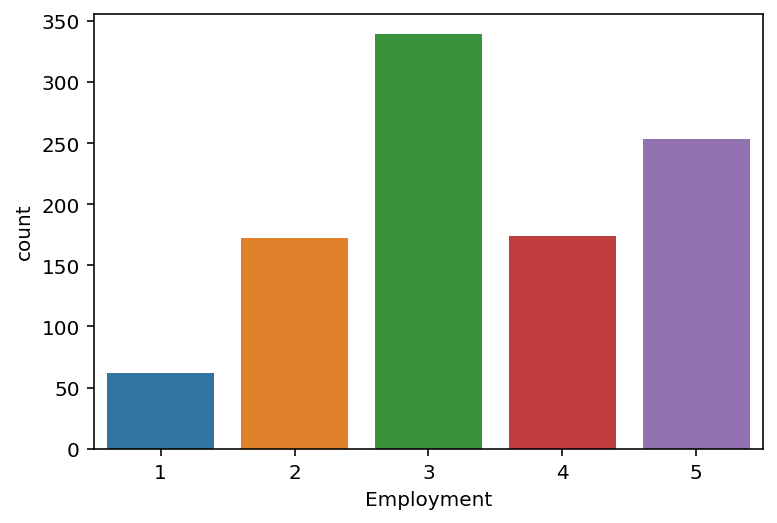

In [85]:
# Payment
sns.countplot(x=data['Employment'])
plt.show()

- 전체적으로 Employment에서 3(1년 이상 4년 미만)의 경우가 가장 많은 것을 볼 수 있다.
- -> 세부적으로 대출 승인 여부에 따라 봤을 때 3의 경우가 가장 많다.
- 대출 승인이 된 경우는 3보다는 4(4년 이상 7년 미만), 4보다는 5(7년 이상)가 많은 것을 볼 수 있다.
- -> 현 직업 근무 기간이 길면 길수록 경제 활동을 지속적으로 해왔다는 기록이 분명히 있고,
- -> 사회생활을 막 시작한 사람보다 신용도가 높기 때문에 대출 승인 건수가 많은 것이다.

**7) Age**

- Creditability 변수 값으로 구분해 Age 변수 값의 분포를 히스토그램으로 확인합니다.

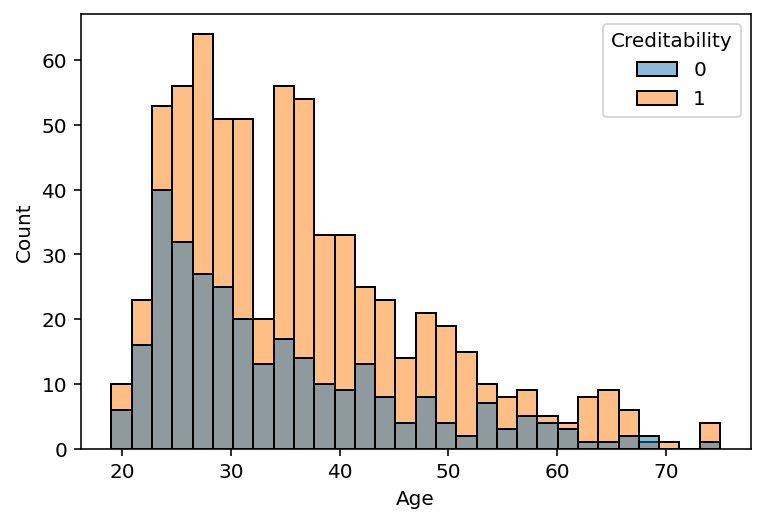

In [20]:
# Age --> Creditability 값 분포
sns.histplot(x=data['Age'], hue=data['Creditability'], bins=30)
plt.show()

- 대출 승인 여부에 따른 나이 차트에서 두 히스토그램이 다 오른쪽으로 꼬리가 긴 분포를 가지고 있다.
- -> 경제 활동 가능 나이대
- 20대 초반에서 대출 승인거부 건수가 가장 높게 나온다.
- 20대 후반과 30대 중반에서 대출 승인 건수가 높게 나오는 것을 볼 수 있다.
- 30대 초반에 다른 구간보다 대출 건수가 없는 것을 볼 수 있다.
- -> 왜? 

**8) CreditDuration**

- Creditability 변수 값으로 구분해 CreditDuration 변수 값의 분포를 히스토그램으로 확인합니다.

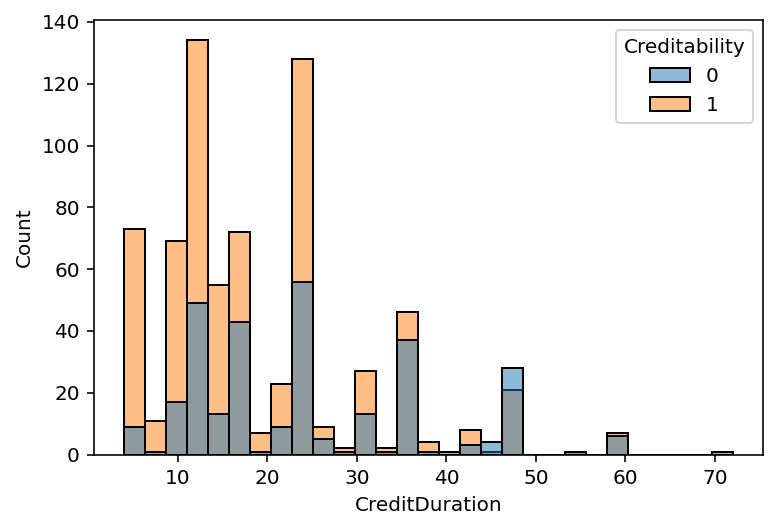

In [23]:
# CreditDuration -> Creditability 값 분포
sns.histplot(x=data['CreditDuration'], hue=data['Creditability'])
plt.show()

- 신청한 대출 기간이 짧으면 짧을수록 대출 승인 건수가 높은 것을 볼 수 있다.
- 약 45개월을 기준으로 대출 승인 여부가 달라진다.
- -> 고객의 입장에서는 대출을 고려할 때 45개월 미만으로 하는 것도 대출 승인율을 올릴 수 있는 방법이 될 것이다.
- 10개월, 20개월을 기점으로 대출 승인 건수가 높은 것을 볼 수 있다.
- -> 은행 입장에서 전산 시스템의 편의를 위해서 대출 기간을 정해둔 것이 아닐까?

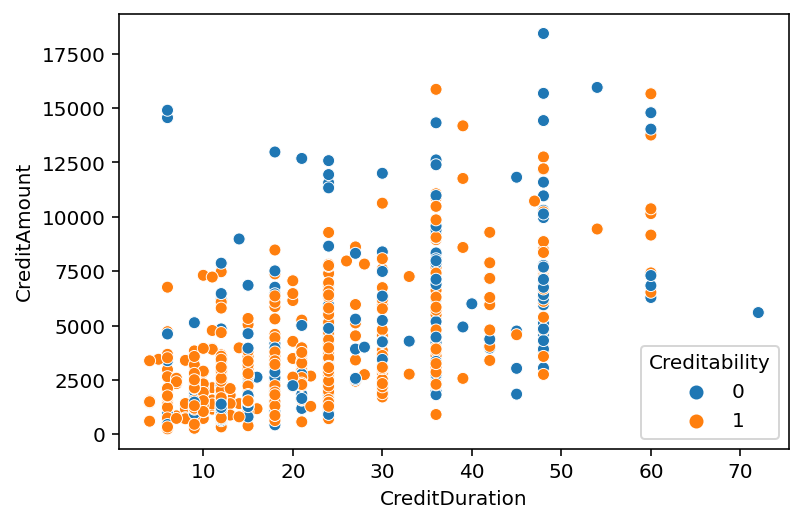

In [56]:
sns.scatterplot(data['CreditDuration'], data['CreditAmount'], hue=data['Creditability'])
plt.show()

- 대출기한이 짧고 대출 금액이 낮을수록 대출이 허용되는 양상을 보인다. 

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- Age 변수에 대한 결측치 처리를 진행합니다.
- 데이터 양이 많지 않으니 제거 보다는 채우기를 권고합니다.

In [61]:
# 결측치를 각 appartment에 해당하는 Age 중앙값으로 채우기
data['Age'].fillna(data.groupby('ApartmentType')['Age'].transform('median'), inplace=True)
# 확인
data['Age'].isna().sum()

0

**2) x, y 분리**

- Target을 선정하고 x, y를 분리합니다.

In [9]:
# target 확인
target = 'Creditability'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 앞에서 범주형으로 구분한 변수에 대해 가변수화를 수행합니다.
- 참고: 이미 x, y로 분리가 되었으니 x에 대한 가변수화를 수행해야 합니다.


In [10]:
# 가변수화
x = pd.get_dummies(x, columns=col_r, drop_first=True)

# 확인
x.head()

,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,24,1249,28.000000,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,9,276,22.000000,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,1049,21.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,24,6419,35.495422,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,12,1424,55.000000,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


**4) 정규화**

- 앞에서 연속형으로 구분한 변수에 대해 정규화를 진행합니다.

In [11]:
# 정규화
x_r = ['CreditDuration', 'CreditAmount', 'Age']
x[x_r] = (x[x_r] - x[x_r].min())/(x[x_r].max()-x[x_r].min())

# 확인 
x.head()

,CreditDuration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Payment_4,Purpose_1,...,ApartmentType_2,ApartmentType_3,NoCredits_2,NoCredits_3,NoCredits_4,Occupation_2,Occupation_3,Occupation_4,Telephone_2,ForeignWorker_2
0,0.294118,0.054969,0.160714,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.073529,0.001431,0.053571,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.205882,0.043964,0.035714,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.294118,0.339441,0.294561,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,1,0
4,0.117647,0.064598,0.642857,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


**5) 학습용, 평가용 데이터 분리**


- 모델링을 위해 학습용, 평가용 데이터를 분리합니다.

In [12]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 다음 알고리즘을 사용해 모델링을 진행합니다.
    - Logistic Regression
    - KNN
    - Decision Tree
    - Random Forest
    - XGBoost
- Classification Report를 사용해 성능을 평가합니다.
- 성능 평가 결과 아래에 성능에 대한 의견을 정리합니다.
- 혼동행렬, 변수 중요도 등을 시각화해 모델을 심도있게 탐색합니다.

## 4.1.Logistic Regression

### 4.1.1.모델링

- Logistic Regression 알고리즘을 사용해 모델링을 진행합니다.

In [13]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [14]:
# 2단계: 선언하기
model = LogisticRegression() 

In [15]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [17]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 48  49]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.61      0.49      0.55        97
           1       0.78      0.85      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.72      0.73      0.73       300



- 정확도가 0.73으로 괜찮은 수준으로 데이터를 분류했다.
- 0의 재현율이 0.49로 낮은 수준을 보인다.
- -> 0과 1의 데이터 불균형으로 인한 결과 차이

### 4.1.2.모델 탐색

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 성능 정보**

- 각 모델의 성능 정보를 한 눈에 파악합니다. 

In [18]:
# 성능 정보 수집
score={}
score['Logistic Regression'] = accuracy_score(y_test, y_pred)

-Logistic Regression: 0.7333


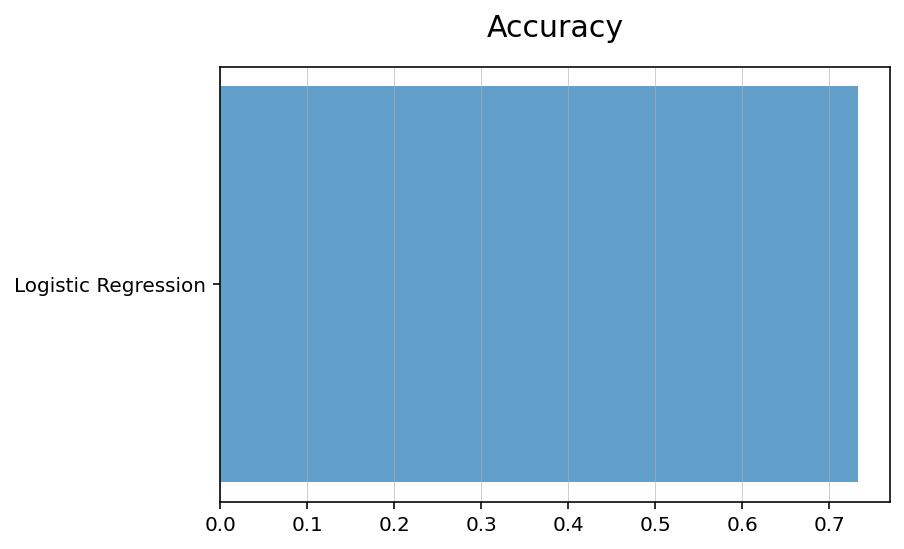

In [92]:
# 성능 정보 시각화
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

**2) 혼동행렬 시각화**

- 얼마나 잘 분류가 되었는지 한 눈에 확인

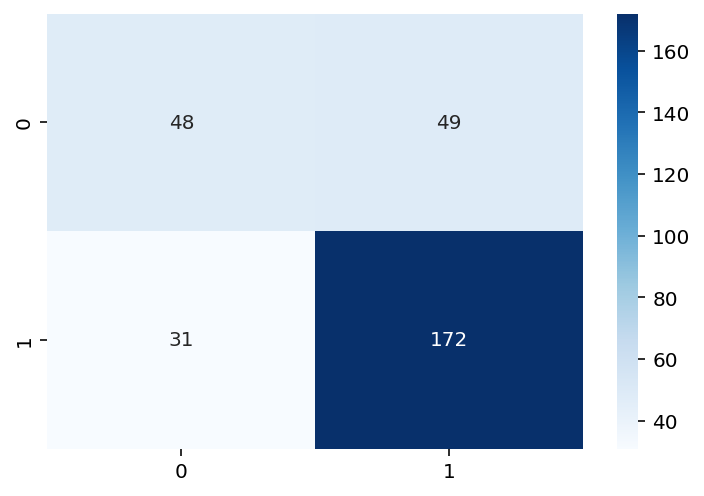

In [167]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

- 1에 해당하는 데이터가 가장 많았기 때문에 31개만 오분류하고 172개는 잘 분류한 것으로 보인다.
- 정확도가 0.7333으로 높게 나온 것을 볼 수 있는데, 1의 데이터가 많기 때문이다.
- 반면에 0은 각각 48, 49개로 반 이상이 오분류 한 것으로 나타난다.

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘을 사용해 모델링을 진행합니다.

In [19]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier

In [20]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022) 

In [21]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [22]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [23]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 45  52]
 [ 57 146]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45        97
           1       0.74      0.72      0.73       203

    accuracy                           0.64       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.64      0.64      0.64       300



In [24]:
# 성능 정보 수집
score['Decision Tree'] = accuracy_score(y_test, y_pred)

- 결정나무의 정확도가 0.64로 로지스틱회귀보다 낮다.
- 로지스틱회귀에서는 0의 재현율만 낮았는데, 결정나무에서는 0의 재현율(0.46)과 정밀도(0.44) 둘 다 낮다.

### 4.2.2.모델 탐색



- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 트리 시각화**

- max_depth를 설정하지 않는 모델에서 plot_tree를 사용해 시각화해 확인합니다.

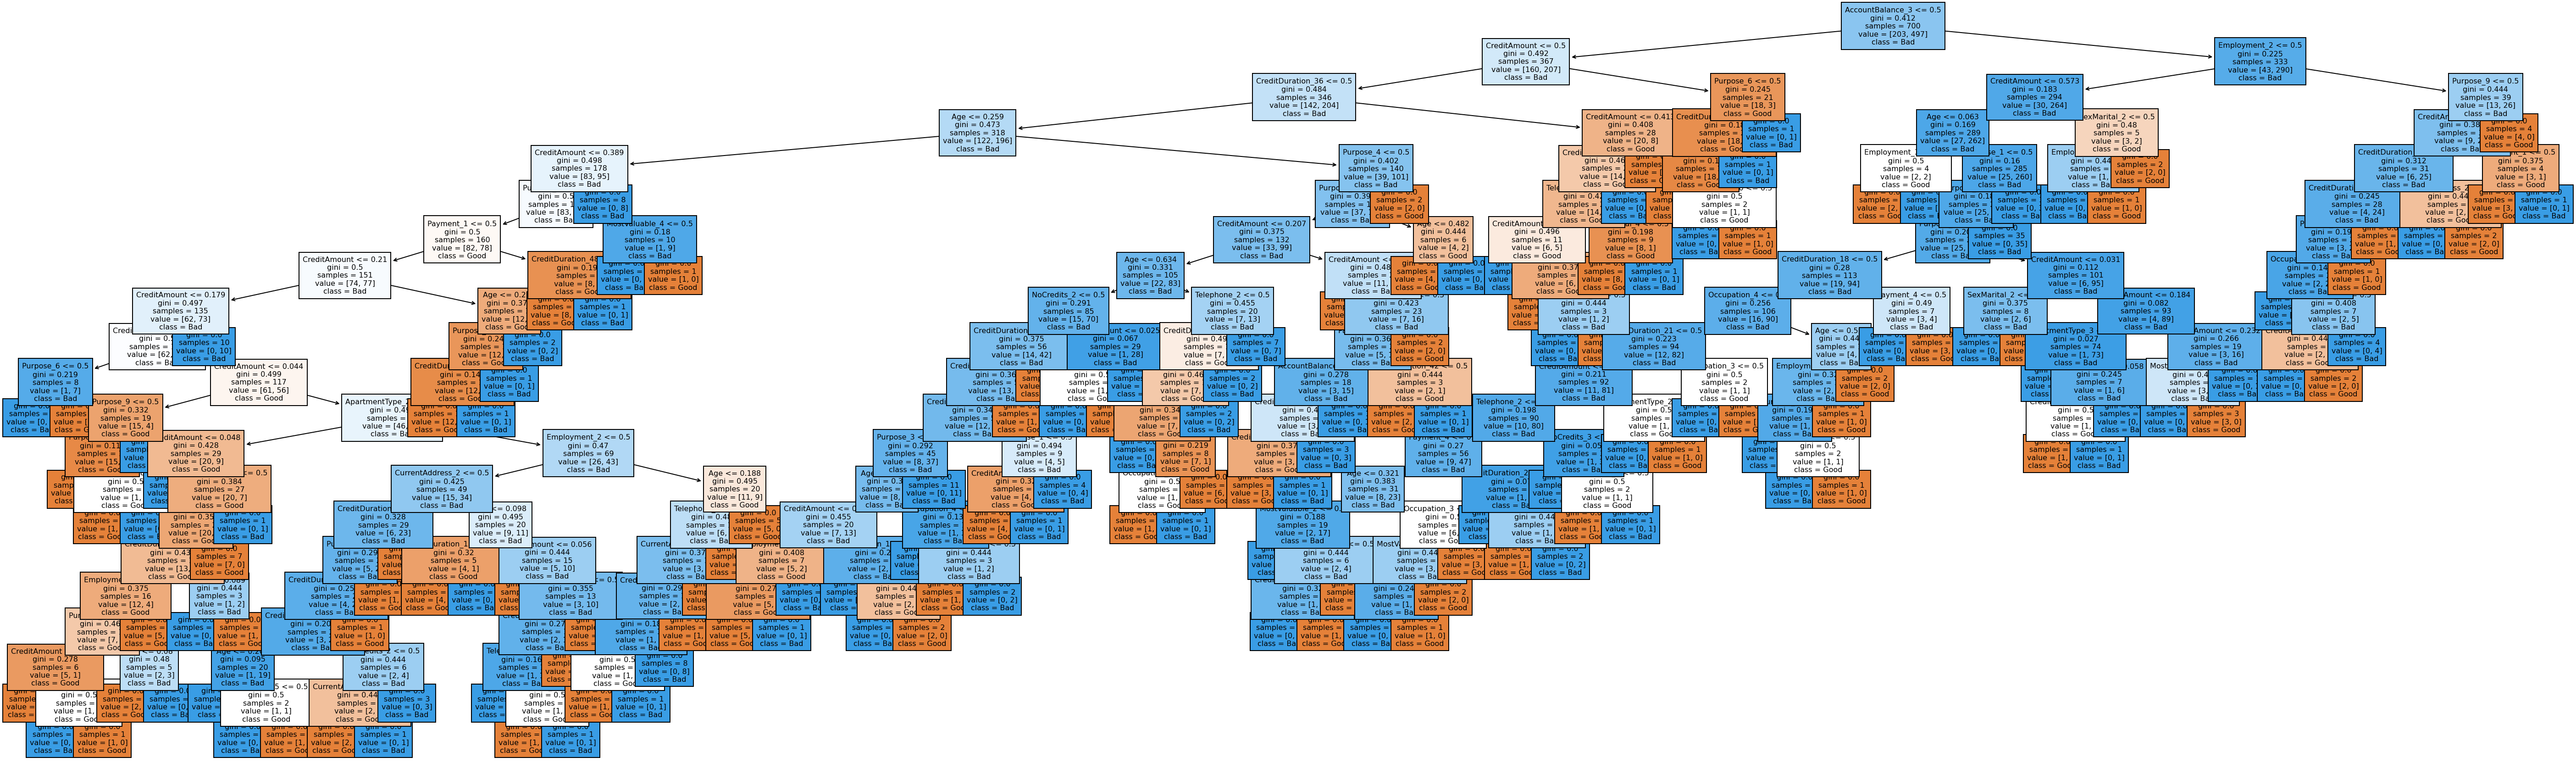

In [53]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 15))
plot_tree(model, filled=True, class_names=['Good', 'Bad'], feature_names=list(x), fontsize=8)
plt.show()

- 트리의 깊이를 제한하지 않았을 때 끝까지 분류하기 때문에 다음과 같은 시각화 결과를 갖는다
- 결정나무의 첫 분기점이 AccountBalance(은행 잔고)임을 확인할 수 있다.

**2) 변수 중요도 확인**

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [99]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
35,NoCredits_4,0.000000
30,MostValuable_4,0.000000
21,Employment_5,0.000000
17,Purpose_10,0.000000
15,Purpose_8,0.000000
12,Purpose_4,0.000000
11,Purpose_3,0.004375
34,NoCredits_3,0.006167
26,CurrentAddress_3,0.006244
24,SexMarital_4,0.007774


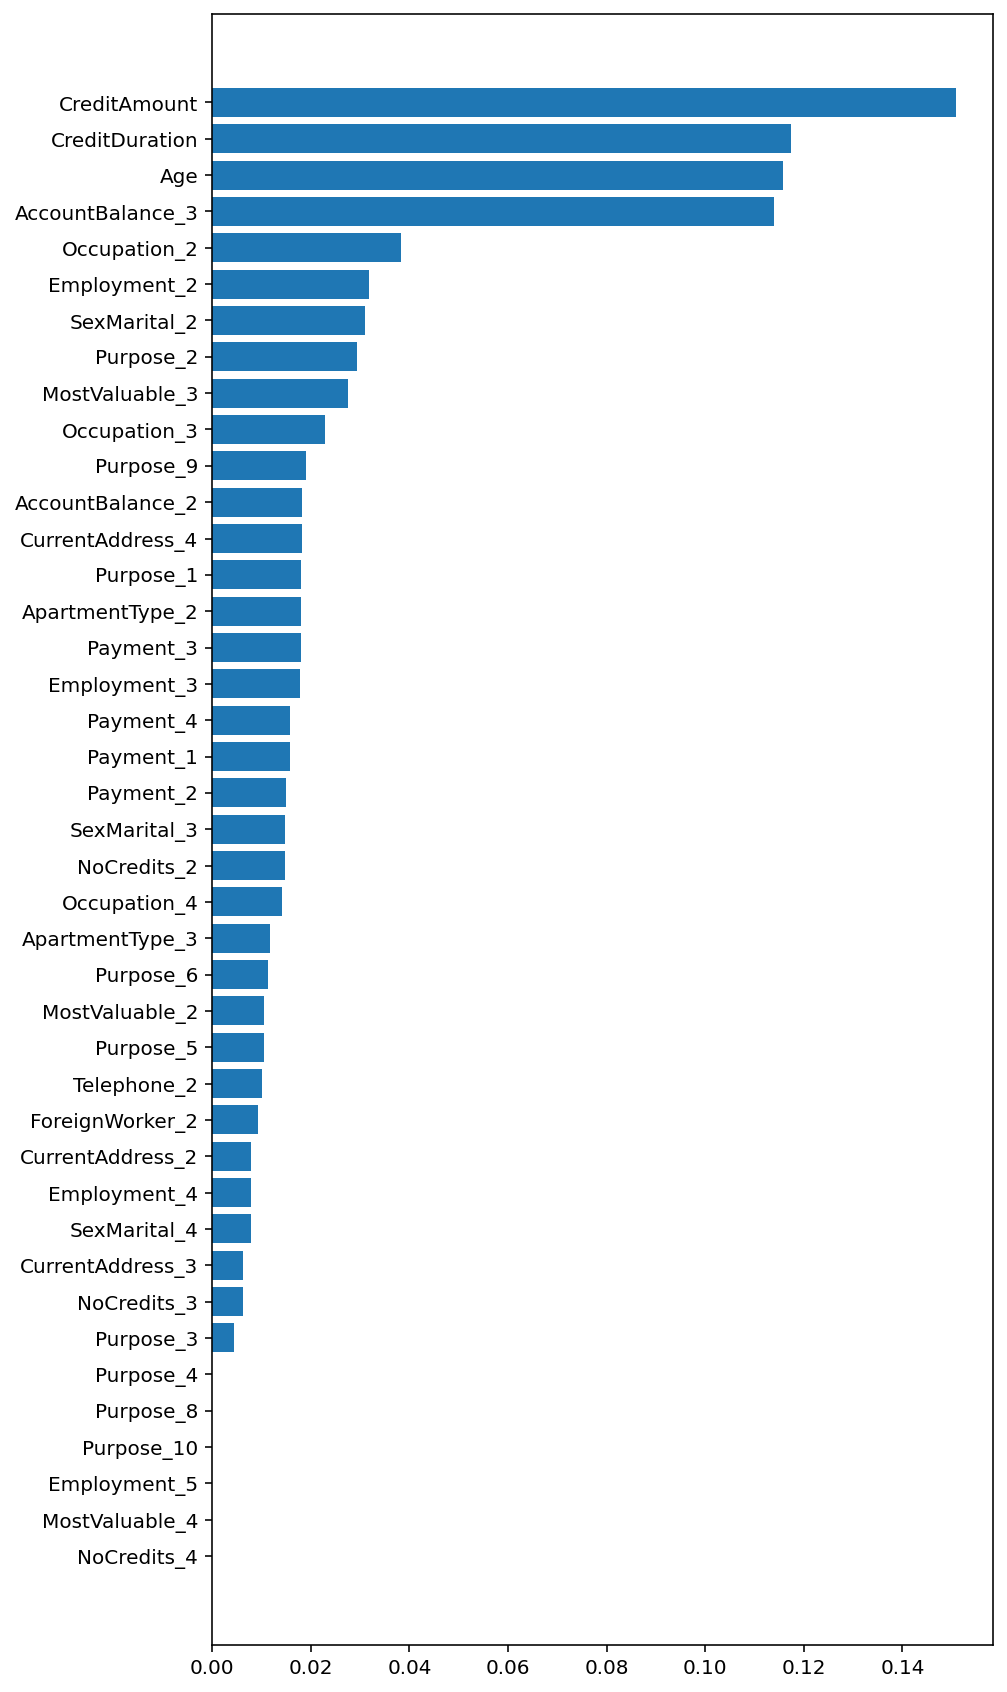

In [100]:
# 중요도 시각화
plt.figure(figsize=(7, 15))
plt.barh(im['feature'], im['score'])
plt.show()

- 결정나무에서 CreditAmount > CreditDuration > Age > AccountBalance 순으로 변수가 중요하다.
- 4가지의 변수 외에는 특성 중요도가 높지 않을 것을 볼 수 있다.

## 4.3.KNN

### 4.3.1.모델링

- KNN 알고리즘을 사용해 모델링을 진행합니다.

In [25]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [27]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [29]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 31  66]
 [ 30 173]]
              precision    recall  f1-score   support

           0       0.51      0.32      0.39        97
           1       0.72      0.85      0.78       203

    accuracy                           0.68       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.65      0.68      0.66       300



- KNN에서 정확도는 0.68이다. 
- 0의 재현율이 앞의 두 모델보다 더 낮은 0.32이다.

### 4.3.2.모델 탐색

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 성능 정보 확인**

- 각 모델의 성능 정보를 한 눈에 파악합니다.

In [30]:
# 성능 정보 수집
score['KNN'] = accuracy_score(y_test, y_pred)

-Logistic Regression: 0.7333
-Decision Tree: 0.6367
-KNN: 0.6800


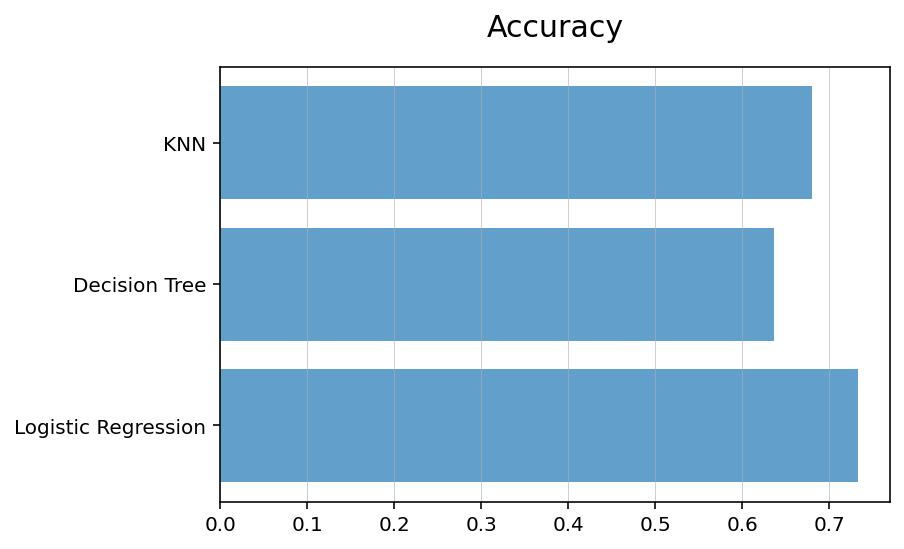

In [109]:
# 성능 정보 시각화
for k, v in score.items():
    print(f'-{k}: {v:.4f}')
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- 3개의 모델 정확도 비교 결과 로지스틱회귀가 가장 높은 0.73으로 나타난다.

## 4.4.Random Forest

### 4.4.1.모델링

- Random Forest 알고리즘을 사용해 모델링을 진행합니다.

In [31]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier

In [32]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [33]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [34]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [35]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 39  58]
 [ 28 175]]
              precision    recall  f1-score   support

           0       0.58      0.40      0.48        97
           1       0.75      0.86      0.80       203

    accuracy                           0.71       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.70      0.71      0.70       300



- Random Forest의 정확도가 0.71로 나타난다.
- Random Forest가 0의 경우 58개를 잘못 분류함을 볼 수 있다.
- -> 0의 recall이 0.4로 다른 수치보다 낮은 것을 볼 수 있다.

### 4.4.2.모델 탐색

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 성능 정보 확인**

- 각 모델의 성능 정보를 한 눈에 파악합니다.

In [36]:
# 성능 정보 수집
score['Random Forest'] = accuracy_score(y_test, y_pred)

-Logistic Regression: 0.7333
-Decision Tree: 0.6367
-KNN: 0.6800
-Random Forest: 0.7133


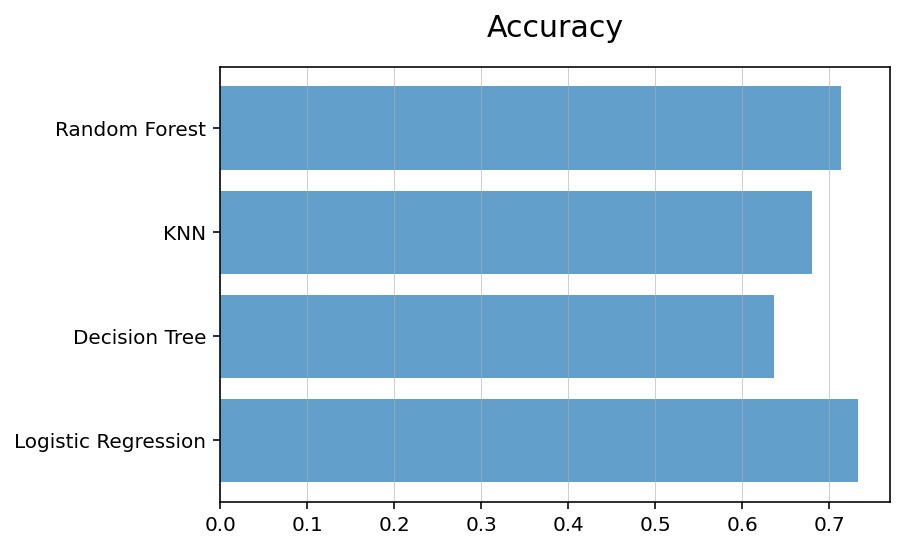

In [37]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- 앞의 4가지 모델에서 정확도에서 로지스틱 회귀가 가장 높다.

**2) 변수 중요도 확인**

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [125]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
15,Purpose_8,0.001727
35,NoCredits_4,0.001866
17,Purpose_10,0.002169
12,Purpose_4,0.005066
34,NoCredits_3,0.005835
40,ForeignWorker_2,0.005846
13,Purpose_5,0.006851
32,ApartmentType_3,0.009412
14,Purpose_6,0.010157
24,SexMarital_4,0.010221


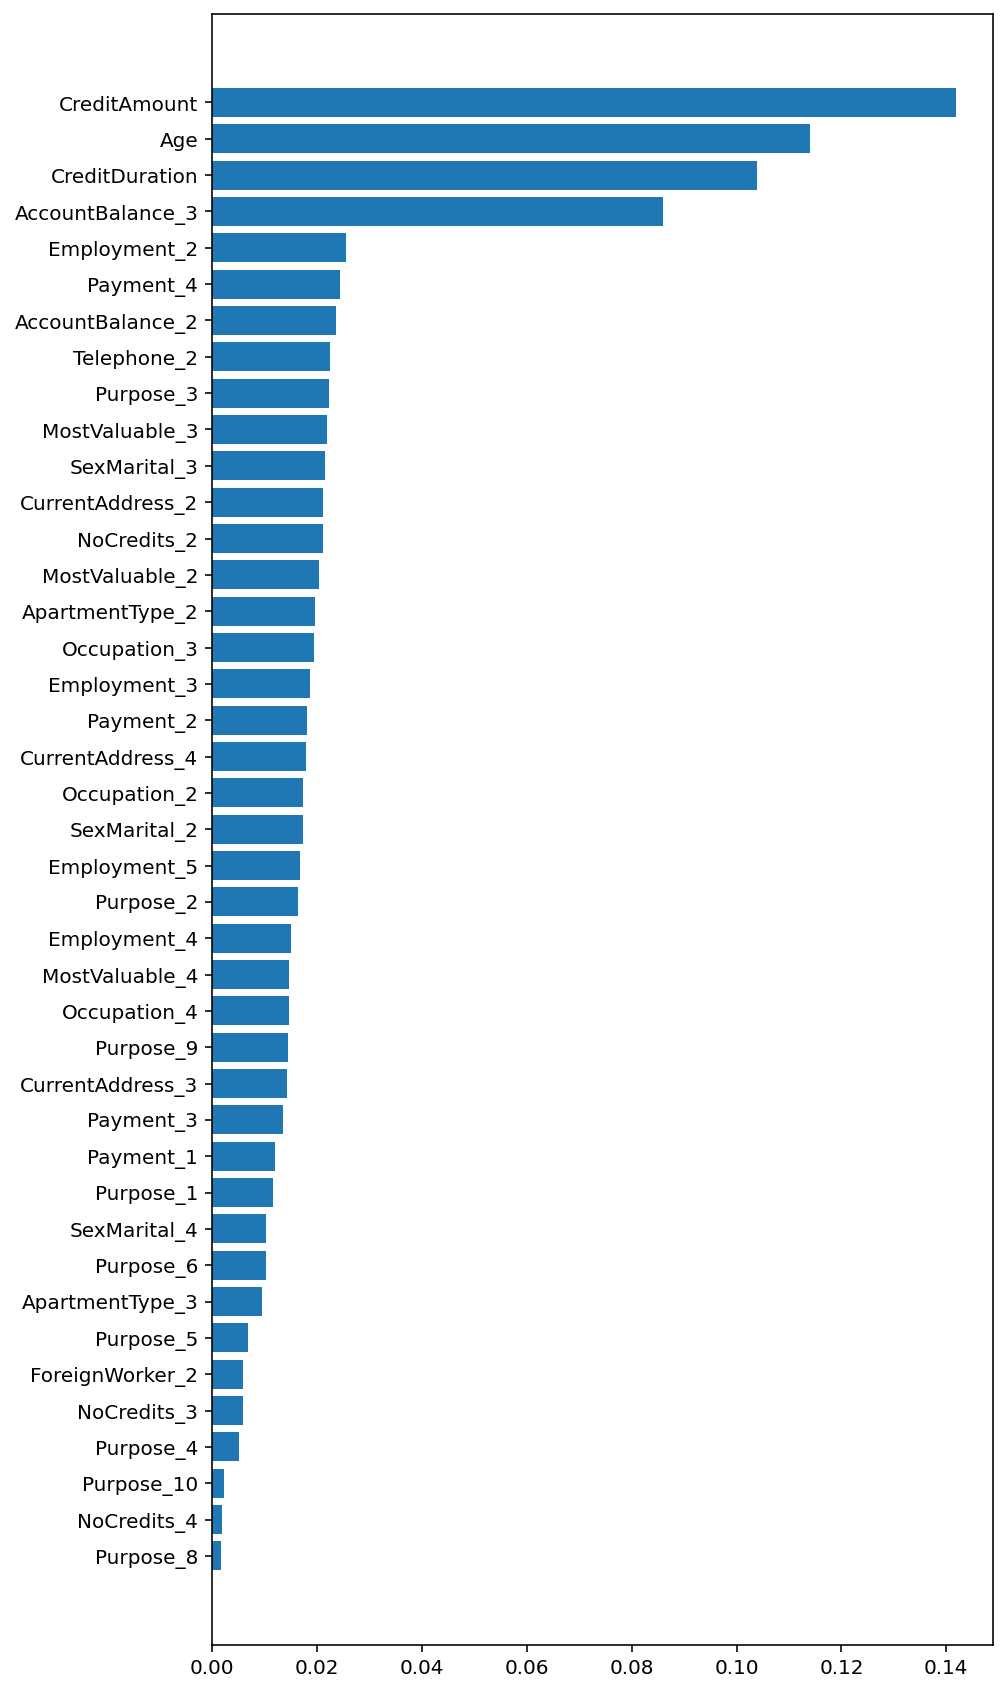

In [126]:
# 중요도 시각화
plt.figure(figsize=(7, 15))
plt.barh(im['feature'], im['score'])
plt.show()

- RandomForest에서 CreditAmount > Age > CreditDuration > AccountBalance_3 순으로 변수가 중요함을 확인할 수 있다.
- 앞의 4개의 변수외에는 변수 중요도가 낮다.
- 대출 승인 여부에는 대출 금액, 나이, 대출 기한, 과거 대출 납입 상태 4가지에서 당락이 된다

## 4.5.XGBoost

### 4.5.1.모델링

- XGBoost 알고리즘을 사용해 모델링을 진행합니다.

In [38]:
# 1단계: 불러오기
from xgboost import XGBClassifier

In [39]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [40]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[14:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [131]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 52  45]
 [ 42 161]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.54        97
           1       0.78      0.79      0.79       203

    accuracy                           0.71       300
   macro avg       0.67      0.66      0.67       300
weighted avg       0.71      0.71      0.71       300



- XGBoost에서 정확도가 0.71이다.
- 0의 경우 45개를 오분류했다
- 0의 재현율(0.54)이 앞의 모델보다 향상된 것을 볼 수 있다.

### 4.5.2.모델 탐색

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 성능 정보 확인**


In [42]:
# 성능 정보 수집
score['XGBoost'] = accuracy_score(y_test, y_pred)

-Logistic Regression: 0.7333
-Decision Tree: 0.6367
-KNN: 0.6800
-Random Forest: 0.7133
-XGBoost: 0.7100


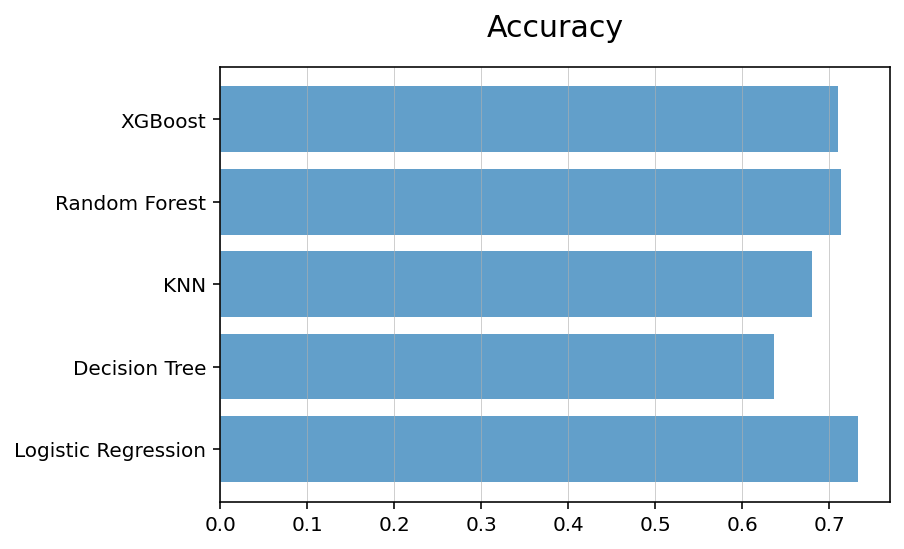

In [133]:
# 성능 정보 시각화
for k, v in score.items():
    print(f'-{k}: {v:.4f}')
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- XGBoost의 0의 재현율이 가장 높았음에도 정확도는 로지스틱 회귀모델이 가장 높다.

**2) 변수 중요도 확인**

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [134]:
# 중요도 확인
im = pd.DataFrame()
im['feature'] = list(x)
im['score'] = model.feature_importances_
im.sort_values(by='score', ascending=True, inplace=True)
im

,feature,score
15,Purpose_8,0.000000
12,Purpose_4,0.000000
34,NoCredits_3,0.000000
35,NoCredits_4,0.000000
17,Purpose_10,0.000000
24,SexMarital_4,0.005730
6,Payment_2,0.011947
19,Employment_3,0.012687
10,Purpose_2,0.014445
29,MostValuable_3,0.014489


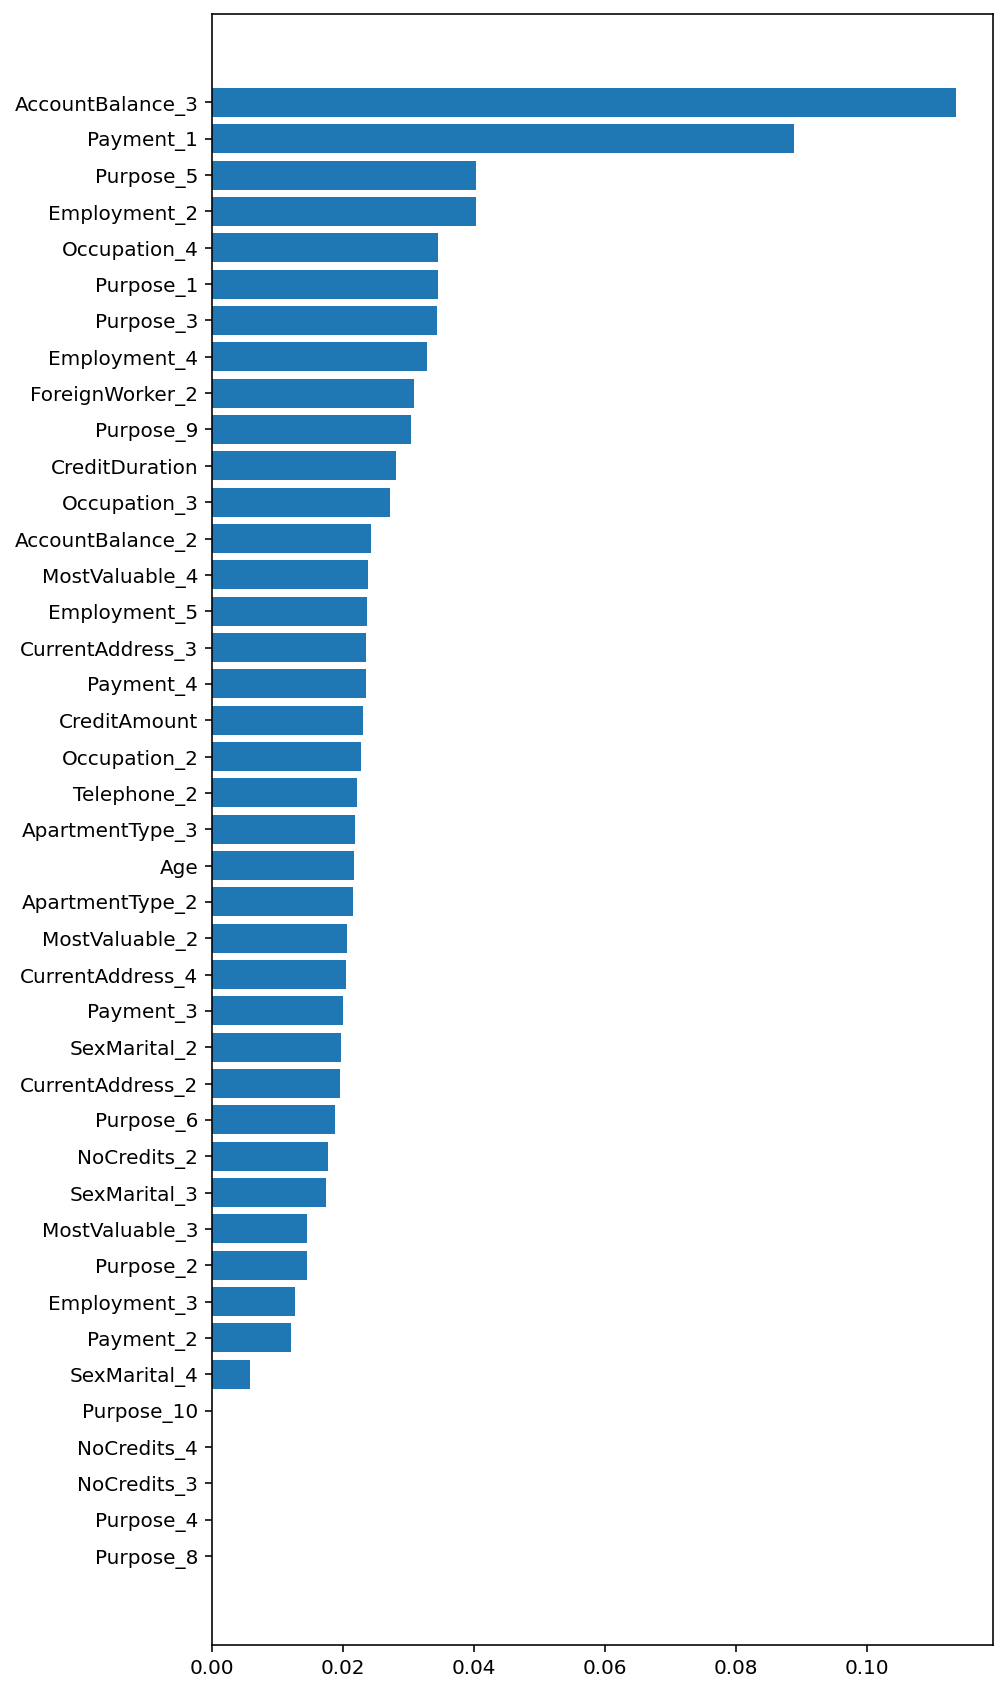

In [135]:
# 중요도 시각화
plt.figure(figsize=(7, 15))
plt.barh(im['feature'], im['score'])
plt.show()

- XGBoost에서 AccountBalance_3(은행잔고) > Payment_1(과거 대출 납입 상태) 순으로 변수가 중요하다.

# 5.모델 성능 비교 및 정리

-Logistic Regression: 0.7333
-Decision Tree: 0.6367
-KNN: 0.6800
-Random Forest: 0.7133
-XGBoost: 0.7100


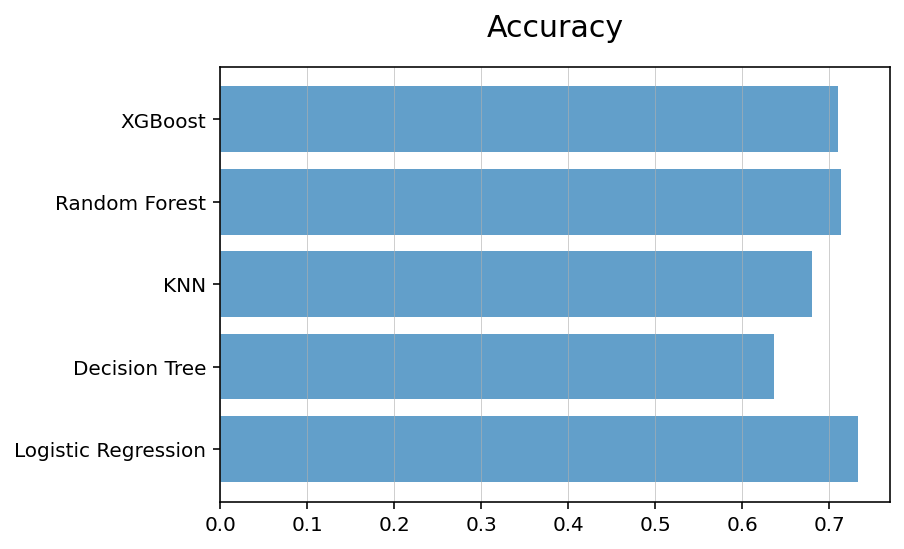

In [43]:
# 성능 정보 시각화
for k, v in score.items():
    print(f'-{k}: {v:.4f}')
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- 5개 모델 중 정확도가 가장 높은 모델은 로지스틱 회귀이다.(0.73)
- 특히나 0의 재현율이 각 모델에서 낮은 것을 확인할 수 있었는데, 0과 1의 데이터 불균형으로 인한 결과로 이어진 것 같다.
- -> 각 모델의 성능을 높이려면 데이터 불균형을 해소하면 성능이 좋아질 것이다.

<br>

- 각 모델의 특성 중요도
>결정나무 특성 중요도 :CreditAmount > CreditDuration > Age > AccountBalance 
RandomForest 특성 중요도 : CreditAmount > Age > CreditDuration > AccountBalance_3 
XGBoost 특성 중요도 : AccountBalance_3 > Payment_1
> - -> 공통적으로 CreditAmount(대출 금액), CreditDuration(대출 기한), AccountBalance(과거 대출 납입 상태), Age(나이) 특성이 중요하다.

# 6.성능 튜닝

- 특정 알고리즘의 모델을 튜닝 대상으로 정하고 나름의 방법으로 모델 성능을 높여봅니다.

## 6.1.Random Forest튜닝

### 6.1.1.튜닝

- RandomSearch

In [137]:
# 불러오기
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [138]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 51),
         'min_samples_leaf':range(1, 11),
         'min_samples_split':range(2, 11),
         'n_estimators':range(10, 211, 10)}

In [140]:
# 튜닝
model_rt = RandomForestClassifier(random_state=2022)
model = RandomizedSearchCV(model_rt,
                           param, 
                           cv = 10,
                           n_iter=30,
                           n_jobs=-1)

In [141]:
# 학습하기
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 51),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 211, 10)})

In [142]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_estimators': 170, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 17}
최고 성능 : 0.7557142857142857


- 'n_estimators' : 170, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 17의 파라미터가 선택되었다.
- 다음의 파라미터를 가지고 훈련 데이터에서 낼 수 있는 최고 성능이 0.7557로 나왔다.

### 6.1.2.튜닝 결과

In [145]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 33  64]
 [ 23 180]]
              precision    recall  f1-score   support

           0       0.59      0.34      0.43        97
           1       0.74      0.89      0.81       203

    accuracy                           0.71       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.69      0.71      0.68       300



In [147]:
# 성능 정보 수집
score['RandomForest_RS'] = accuracy_score(y_test, y_pred)

- 최고 성능이 0.75로 나왔지만 test 데이터로 평가한 결과 0.71의 정확도가 나왔다.

## 6.2. XGBoost튜닝

### 6.2.1.튜닝

- RandomSearch

In [148]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 51),
         'n_estimators':range(10, 211, 10)}

In [149]:
# 튜닝
model_rt = XGBClassifier(random_state=2022)
model = RandomizedSearchCV(model_rt,
                           param, 
                           cv = 5,
                           n_iter=30,
                           n_jobs=-1)

In [150]:
# 학습하기
model.fit(x_train, y_train)

[11:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                     

In [157]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_estimators': 120, 'max_depth': 1}
최고 성능 : 0.7485714285714286


- 'n_estimators': 120, 'max_depth': 1의 파라미터가 선택되었다.
- 다음의 파라미터를 가지고 훈련 데이터에서 낼 수 있는 최고 성능이 0.7485로 나왔다.

### 6.2.2.튜닝 결과

In [158]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 49  48]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.61      0.51      0.55        97
           1       0.78      0.85      0.81       203

    accuracy                           0.74       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.73      0.74      0.73       300



In [154]:
# 성능 수집
score['XGBoost_RS'] = accuracy_score(y_test, y_pred)

- 최고 성능이 0.74로 나왔고 test 데이터로 평가한 결과 0.74의 동일한 정확도가 나왔다.
- 튜닝 결과 기본 XGBoost보다 더 향상된 성능을 가진다.

In [51]:
model = RandomForestClassifier(random_state=2022, max_depth=17)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score['Randomforest_RS'] = accuracy_score(y_test, y_pred)

In [54]:
model = XGBClassifier(random_state=2022, max_depth=1, n_estimators=120)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score['XGBoost_RS'] = accuracy_score(y_test, y_pred)

[14:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### 전체 모델 성능 시각화

-Logistic Regression: 0.7333
-Decision Tree: 0.6367
-KNN: 0.6800
-Random Forest: 0.7133
-XGBoost: 0.7100
-Randomforest_RS: 0.7333
-XGBoost_RS: 0.7367


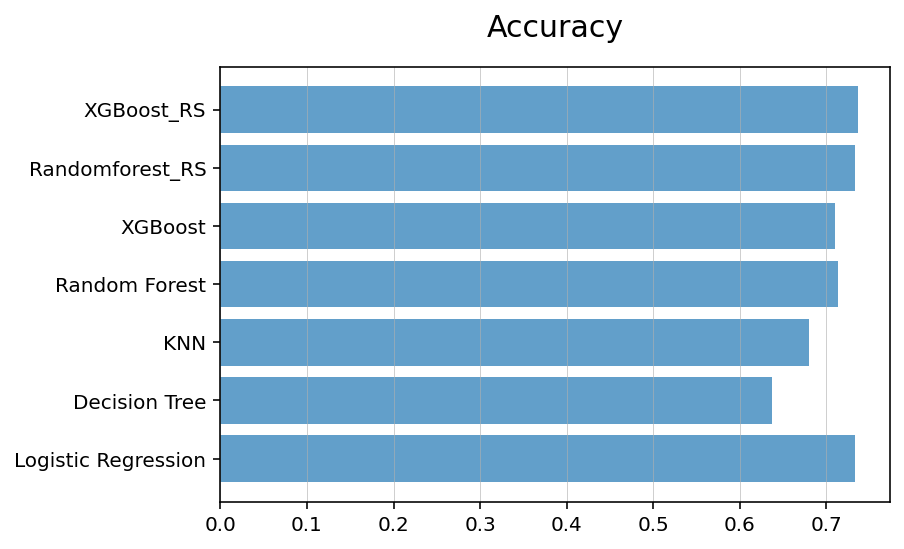

In [55]:
# 성능 정보 시각화
for k, v in score.items():
    print(f'-{k}: {v:.4f}')
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

# 7.종합 정리

- target에서 0과 1의 데이터 불균형 문제를 발견했다. (1:대출승인 > 0:대출승인거부)
> - 각 머신러닝 진행시 1의 클래스를 더 많이 예측하는 쪽으로 모델이 편향되는 경향이 있다.
> - 특히나 0의 재현율이 각 모델에서 낮은 것을 확인
> - Resampling을 통해 불균형 문제를 해소 가능 할 것이다.

<br>



- 고객 입장) 대출 승인 가능성 높이기
> - 1. 해당 은행 계좌 개설과 여윳돈 넣어놓기
> - 2. 해당 은행 과거 대출 이력 살펴보기
> - 3. 본인의 현재 회사 근무 기간이 최소 1년 이상일 때부터 대출 알아보기
> - 4. 대출 기한을 짧게 정하기(10-20 개월)

<br>

- 은행 입장) 대출승인율 높이기
> - 대출승인율을 높이기 위해 평균적으로 승인을 하게 되는 기준을 먼저 고객에게 제시한다. (ex. 광고, 은행 유투브 채널, 은행 인스타그램 등)


<br>

- 추가 분석해보면 좋을 것
> - 은행 잔고가 있는 고객 중에서 대출 승인 건수 차이를 보인다. 잔고 금액이 어느정도 되어야 대출 승인이 나는지?
> - 과거 대출 상태에서 완납을 한 경우에서도 대출 승인 거부 건수가 많이 있다. 과거와 최근의 신용도 차이가 있어보인다. -> 과거와 현재 신용도 점수가 있으면 미래 고객의 대출 승인여부 예측에 도움이 되지 않을까?